# Introduction
In this kernel, we will use Linear Regression and KNN Algortihm with "Biomedical features of orthopedic patients" dataset.

 * [Importing Dataset](#1)
 * [EDA](#2)
      * Subplots
      * Countplot
      * Scatterplots
 * [Linear Regression](#3)
 * [KNN Algorithm](#4)
     * [When Do we use KNN Algorithm](#5)
     * [How Does the KNN Algorithm work?](#6)
     * [How Do we choose the factor K?](#7)
 * [Conclusion](#8)

<a id="1"></a> <br>
## Importing Dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

column_2C_weka.csv
column_3C_weka.csv



In [2]:
# read csv (comma separated value) into data
data = pd.read_csv('../input/column_2C_weka.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['seaborn-darkgrid', 'seaborn', 'dark_background', 'seaborn-talk', '_classic_test', 'Solarize_Light2', 'bmh', 'seaborn-dark', 'seaborn-poster', 'seaborn-muted', 'seaborn-pastel', 'seaborn-paper', 'classic', 'seaborn-ticks', 'seaborn-dark-palette', 'seaborn-white', 'seaborn-colorblind', 'seaborn-bright', 'fast', 'fivethirtyeight', 'ggplot', 'seaborn-deep', 'seaborn-notebook', 'seaborn-whitegrid', 'grayscale', 'tableau-colorblind10']


<a id="2"></a> <br>
## EDA


In [3]:
# to see features and target variable
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
# Well know question is is there any NaN value and length of this data so lets look at info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


In [5]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


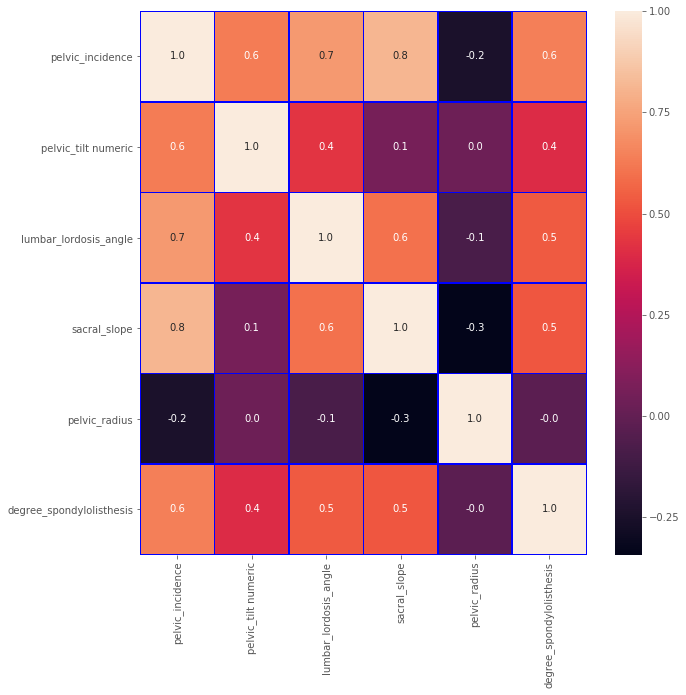

In [6]:
#heatmap
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.6,linecolor="blue",fmt=".1f",ax=ax)
plt.show()

In [7]:
data["class"].value_counts().unique

<bound method Series.unique of Abnormal    210
Normal      100
Name: class, dtype: int64>

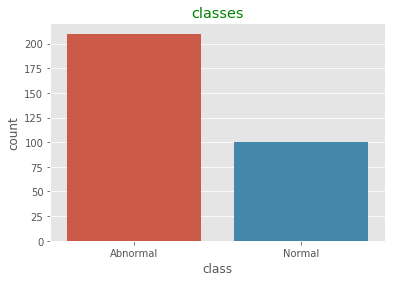

In [8]:
sns.countplot(x="class", data=data)
plt.title("classes", color="green")
plt.show()

pd.plotting.scatter_matrix:

* green: normal and red: abnormal
* c: color
* figsize: figure size
* diagonal: histohram of each features
* alpha: opacity
* s: size of marker
* marker: marker type

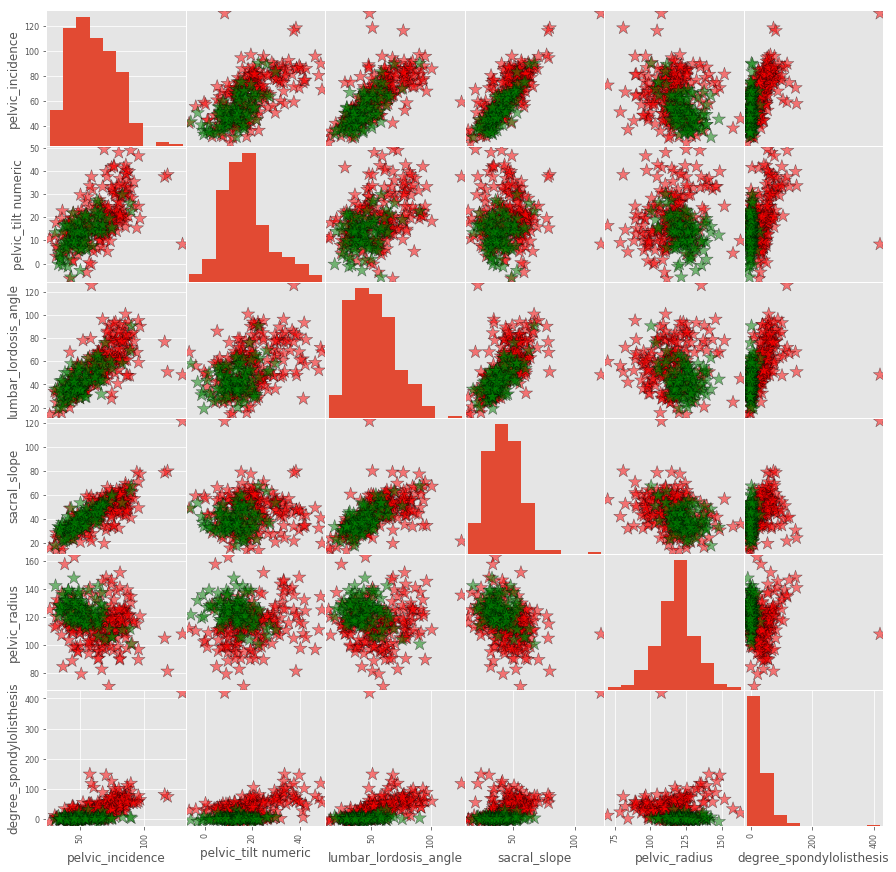

In [9]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

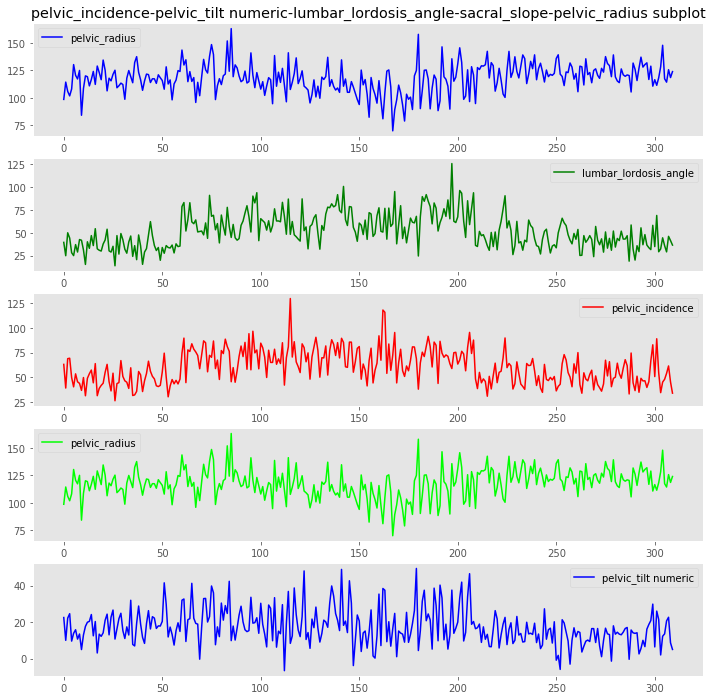

In [10]:
pelvic=data["pelvic_incidence"]
pelvic_tilt=data["pelvic_tilt numeric"]
lumbar=data["lumbar_lordosis_angle"]
sacral_s=data["sacral_slope"]
radius=data["pelvic_radius"]

plt.subplots(figsize=(12,12))

plt.subplot(5,1,1)
plt.title("pelvic_incidence-pelvic_tilt numeric-lumbar_lordosis_angle-sacral_slope-pelvic_radius subplot")
plt.plot(radius,color="b",label="pelvic_radius")
plt.legend()
plt.grid()

plt.subplot(5,1,2)
plt.plot(lumbar,color="g",label="lumbar_lordosis_angle")
plt.legend()
plt.grid()

plt.subplot(5,1,3)
plt.plot(pelvic,color="r",label="pelvic_incidence")
plt.legend()
plt.grid()

plt.subplot(5,1,4)
plt.plot(radius,color="lime",label="pelvic_radius")
plt.legend()
plt.grid()

plt.subplot(5,1,5)
plt.plot(pelvic_tilt,color="b",label="pelvic_tilt numeric")
plt.legend()
plt.grid()


plt.show()

In [11]:
# import graph objects as "go"
import plotly.graph_objs as go

data2=data.copy()

# creating trace1
trace1 =go.Scatter(
                    x = np.arange(0,310),
                    y = data2[data2['class']=='Normal'].sacral_slope,
                    mode = "markers",
                    name = "Normal",
                    marker = dict(color = 'rgba(0, 100, 255, 0.8)'),
                    text= data2['class'])
# creating trace2
trace2 =go.Scatter(
                    x = np.arange(0,310),
                    y = data2[data2['class']=='Abnormal'].sacral_slope,
                    mode = "markers",
                    name = "Abnormal",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= data2['class'])

df = [trace1, trace2]
layout = dict(title = 'sacral_slope',
              xaxis= dict(title= 'index',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Values',ticklen= 5,zeroline= False)
             )
fig = dict(data = df, layout = layout)
iplot(fig)

In [12]:
# pelvic_radius vs class scatter plot
# import graph objects as "go"
import plotly.graph_objs as go

# creating trace1
trace1 =go.Scatter(
                    x = np.arange(0,310),
                    y = data2[data2['class']=='Normal'].pelvic_radius,
                    mode = "markers",
                    name = "Normal",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= data2['class'])
# creating trace2
trace2 =go.Scatter(
                    x = np.arange(0,310),
                    y = data2[data2['class']=='Abnormal'].pelvic_radius,
                    mode = "markers",
                    name = "Abnormal",
                    marker = dict(color = 'rgba(125, 12, 255, 0.6)'),
                    text= data2['class'])

df = [trace1, trace2]
layout = dict(title = 'pelvic_radius',
              xaxis= dict(title= 'index',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Values',ticklen= 5,zeroline= False)
             )
fig = dict(data = df, layout = layout)
iplot(fig)

In [13]:
pie1_list=data["class"].value_counts().values
labels = data["class"].value_counts().index
# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "class",
      "hoverinfo":"label+percent",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Class Type",
        "annotations": [
            { "font": { "size": 15},
              "showarrow": False,
              "text": "class",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

<a id="3"></a> <br>
## Linear Regression


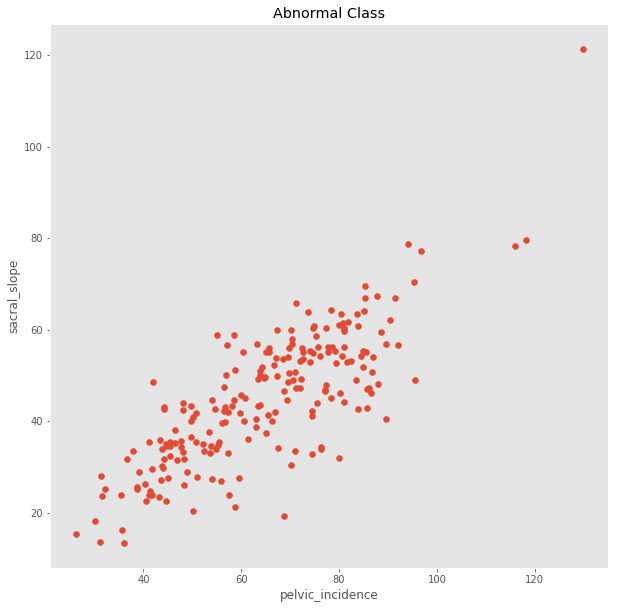

In [14]:
dataa = data[data['class'] =='Abnormal']
x=dataa["pelvic_incidence"].values.reshape(-1,1)
y=dataa["sacral_slope"].values.reshape(-1,1)

#plot
plt.figure(figsize=(10,10))
plt.scatter(x=x,y=y)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.title("Abnormal Class")
plt.grid()
plt.show()

R_square score:  0.6458410481075871
R_2 score with sklearn.metrics library:  0.6458410481075871


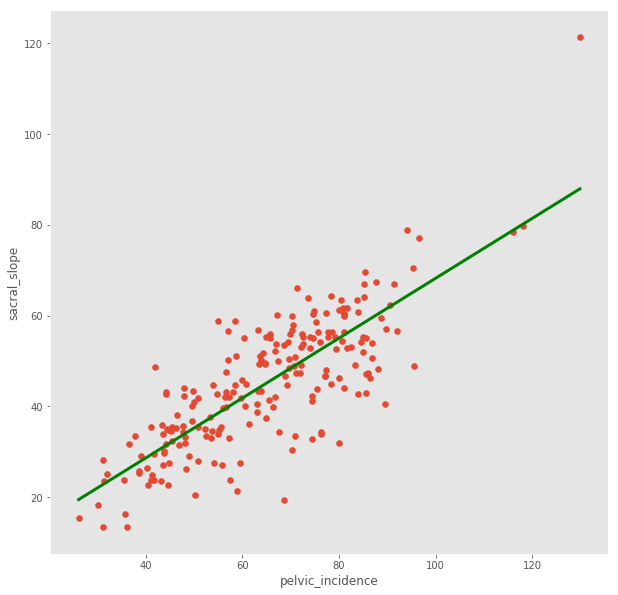

In [15]:
#linear regression
#sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#regression
linear_reg=LinearRegression()

#fit
linear_reg.fit(x,y)

#prediction
# we need these values to plot the regression line.
x_=np.linspace(min(x), max(x)).reshape(-1,1) # 
y_head=linear_reg.predict(x_)

#R2 score with LinearRegression library
print("R_square score: ",linear_reg.score(x,y))
# R2 score with sklearn.metrics
print("R_2 score with sklearn.metrics library: ",r2_score(y,linear_reg.predict(x)))

# Plot regression line and scatter
plt.subplots(figsize=(10,10))
plt.plot(x_, y_head, color='green', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.grid()
plt.show()

In [16]:
A=data[data["class"]=="Abnormal"]
N=data[data["class"]=="Normal"]

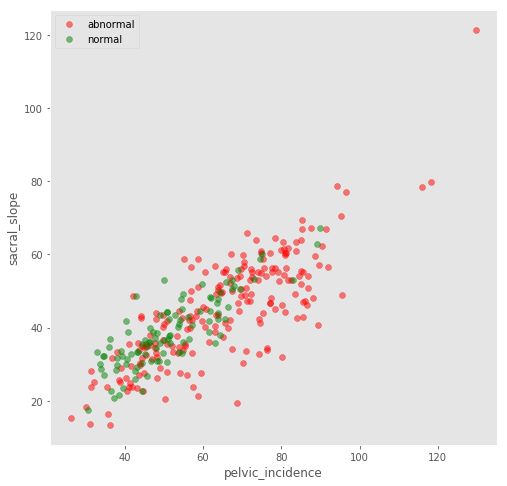

In [17]:
# pelvic_incidence vs sacral_slope scatter plot in terms of class type 
plt.figure(figsize=(8,8))
plt.scatter(A.pelvic_incidence,A.sacral_slope,color="red",label="abnormal",alpha=0.5)
plt.scatter(N.pelvic_incidence, N.sacral_slope,color="green",label="normal",alpha=0.5)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.legend()
plt.grid()
plt.show()

<a id="4"></a> <br>
## KNN Algorithm

<a id="5"></a> <br>
### When do we use KNN algorithm?

KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at 3 important aspects:

1. Ease to interpret output

2. Calculation time

3. Predictive Power

Let us take a few examples to  place KNN in the scale :
<a href="https://imgbb.com/"><img src="https://i.ibb.co/SBqYbS9/1.png" alt="1" border="0"></a>
KNN algorithm fairs across all parameters of considerations. It is commonly used for its easy of interpretation and low calculation time.

<a id="6"></a> <br>
### How does the KNN algorithm work?

Let’s take a simple case to understand this algorithm. Following is a spread of red circles (RC) and green squares (GS) :

<a href="https://ibb.co/gJjn6d7"><img src="https://i.ibb.co/BBz1wGP/2.png" alt="2" border="0"></a>

You intend to find out the class of the blue star (BS) . BS can either be RC or GS and nothing else. The “K” is KNN algorithm is the nearest neighbors we wish to take vote from. Let’s say K = 3. Hence, we will now make a circle with BS as center just as big as to enclose only three datapoints on the plane. Refer to following diagram for more details:

<a href="https://ibb.co/VvL4qfN"><img src="https://i.ibb.co/9qp5rQv/3.png" alt="3" border="0"></a>

The three closest points to BS is all RC. Hence, with good confidence level we can say that the BS should belong to the class RC. Here, the choice became very obvious as all three votes from the closest neighbor went to RC. The choice of the parameter K is very crucial in this algorithm. Next we will understand what are the factors to be considered to conclude the best K.

<a id="7"></a> <br>
### How do we choose the factor K?

First let us try to understand what exactly does K influence in the algorithm. If we see the last example, given that all the 6 training observation remain constant, with a given K value we can make boundaries of each class. These boundaries will segregate RC from GS. The same way, let’s try to see the effect of value “K” on the class boundaries. Following are the different boundaries separating the two classes with different values of K.

<a href="https://ibb.co/tcY8CYv"><img src="https://i.ibb.co/ZKcWTcF/4.png" alt="4" border="0"></a><br /><a target='_blank' href='https://freeonlinedice.com/'>dice rolling website</a><br />
<a href="https://ibb.co/hCXtJVz"><img src="https://i.ibb.co/rvb1RHr/5.png" alt="5" border="0"></a>

If you watch carefully, you can see that the boundary becomes smoother with increasing value of K. With K increasing to infinity it finally becomes all blue or all red depending on the total majority.  The training error rate and the validation error rate are two parameters we need to access on different K-value. Following is the curve for the training error rate with varying value of K :

<a href="https://ibb.co/6W1Zf0P"><img src="https://i.ibb.co/DR8bSfC/6.png" alt="6" border="0"></a>

As you can see, the error rate at K=1 is always zero for the training sample. This is because the closest point to any training data point is itself.Hence the prediction is always accurate with K=1. If validation error curve would have been similar, our choice of K would have been 1. Following is the validation error curve with varying value of K:

<a href="https://ibb.co/y8W8xhQ"><img src="https://i.ibb.co/MRMRJ8C/7.jpg" alt="7" border="0"></a>

This makes the story more clear. At K=1, we were overfitting the boundaries. Hence, error rate initially decreases and reaches a minima. After the minima point, it then increase with increasing K. To get the optimal value of K, you can segregate the training and validation from the initial dataset. Now plot the validation error curve to get the optimal value of K. This value of K should be used for all predictions.

In [18]:
# determine the values
data["class"]=[1 if i=="Abnormal" else 0 for i in data["class"]]

y=data["class"].values
x_data=data.drop(["class"],axis=1)

In [19]:
# normalize the values
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [20]:
# train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [22]:
prediction

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [23]:
y_test

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [24]:
print("{} nn score: {}".format(3,knn.score(x_test,y_test)))

3 nn score: 0.7741935483870968


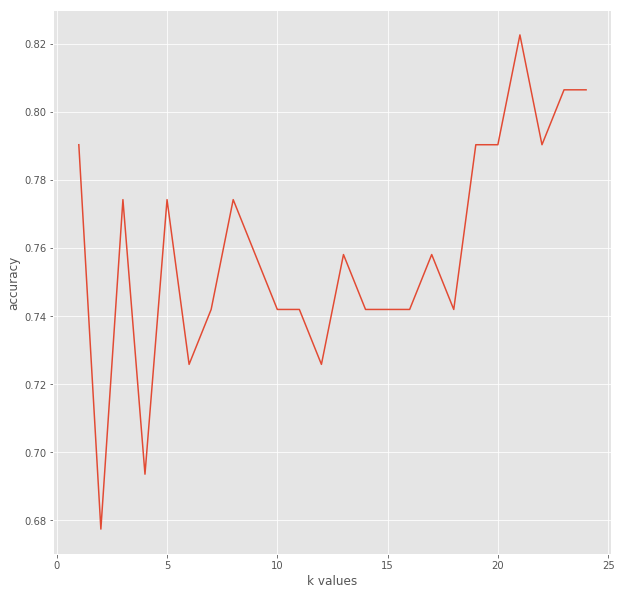

In [25]:
# find the convenient k value for range (1,21)
score_list=[]
for i in range(1,25):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
plt.figure(figsize=(10,10))   
plt.plot(range(1,25),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [27]:
print("{} nn score: {}".format(21,knn.score(x_test,y_test)))

21 nn score: 0.8225806451612904


<a id="8"></a> <br>
### Conclusion
when k=21, we have the most corrected results.


* Referances :
https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/
https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners
